# Classification with SciKit Learn



***What Does Classification Mean?***

Classification is the process of identifying and and grouping objects or ideas into predetermined categories. In data management, classification enables the separation and sorting of data according to set requirements for various business or personal objectives.

In machine learning (ML), classification is used in predictive modeling to assign input data with a class label. For example, an email security program tasked with identifying spam might use natural language processing (NLP) to classify emails as being "spam" or "not spam."

Data classification is a diverse process that involves various methods and criteria for sorting data within a database or repository. This is generally done through a database or business intelligence software that provides the ability to scan, identify and separate data. Some examples and applications of data classification include:

* Separating customer data based on gender
* Identifying and keeping frequently used data in disk/memory cache
* Data sorting based on content/file type, size and time of data
* Sorting for security reasons by classifying data into restricted, public or private data types

**Reference** for this section:

https://www.techopedia.com/definition/13779/classification


In [1]:
# Install Required Packages
!pip install sklearn
!pip install -U scikit-learn --user

!pip install nitime
!pip install PyDrive

  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 98.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.0/4.0 MB 44.1 MB/s eta 0:00:00


In [3]:
from google.colab import drive

# This code connects Colab to Google Drive to import Data
# It can be modified to connect to your Google Drive

drive.mount('/content/gdrive')

import os
# Change the directory to match where your data is located
os.chdir('/content/gdrive/MyDrive/Colab Notebooks/PV_Data')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [4]:
# Check For Colab Notebook connection to a GPU
# https://colab.research.google.com/notebooks/gpu.ipynb#scrollTo=sXnDmXR7RDr2

%tensorflow_version 2.x
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.
Found GPU at: /device:GPU:0


In [5]:
# If connected to a GPU, output summary of the GPU
# https://colab.research.google.com/notebooks/pro.ipynb#scrollTo=QMMqmdiYMkvi
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Tue Aug  8 23:16:38 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA A100-SXM...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   38C    P0    55W / 400W |    707MiB / 40960MiB |      0%      Default |
|                               |                      |             Disabled |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [6]:
# This code ouputs runtime RAM information
# https://colab.research.google.com/notebooks/pro.ipynb#scrollTo=QMMqmdiYMkvi
from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
  print('Not using a high-RAM runtime')
else:
  print('You are using a high-RAM runtime!')

Your runtime has 89.6 gigabytes of available RAM

You are using a high-RAM runtime!


In [8]:
# Import the required packages

import sys
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas import read_csv
from pathlib import Path

import re
import pytz
from datetime import datetime

import enum
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
#from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.svm import NuSVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.neural_network import BernoulliRBM
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import ConfusionMatrixDisplay, classification_report, RocCurveDisplay, auc, roc_curve, roc_auc_score

from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.express as px

import joblib


# Using PathLib to set the directory.  PathLib is OS agnostic
p = Path('.')
datapath = p / "Data/"


### Available SciKit Learn Classifiers
* Decision Tree
* Random Forest
* AdaBoost
* K-Nearest Neighbors
* Gaussian Process
* Gaussian Naive Bayes
* Quadratic Discriminant Analysis
* Support Vector
* Nu-Support Vector
* Multi-Layer Perceptron

In [9]:
# Define Classifier Pipelines

# All inputs execpt random_state should be lists of values, even if only one value

# DECISION TREE CLASSIFIER
def pipeBuild_DecisionTreeClassifier(criterion=['gini'],splitter=['best'], max_depth=[None],random_state=None,):
  classifier = DecisionTreeClassifier(random_state=random_state)
  pipeline = Pipeline(steps=[('decision', classifier)])
  #pipeline = make_pipeline(classifier)
  params = [{
        'decision__criterion': criterion,
        'decision__splitter': splitter,
        'decision__max_depth': max_depth,
    }]
  return pipeline, params

# RANDOME FOREST CLASSIFIER
def pipeBuild_RandomForestClassifier(n_estimators=[100],criterion=['gini'],max_depth=[None],max_features=['sqrt'],random_state=None):
  classifier = RandomForestClassifier(random_state=random_state)
  pipeline = Pipeline(steps=[('random', classifier)])

  params = [{
      'random__n_estimators': n_estimators,
      'random__criterion': criterion,
      'random__max_depth': max_depth,
      'random__max_features': max_features,
  }]
  return pipeline, params

# K NEAREST NEIGHBORS CLASSIFIER
def pipeBuild_KNeighborsClassifier(n_neighbors=[100],weights=['uniform'],algorithm=['auto'],leaf_size=[30]):
  classifier = KNeighborsClassifier()
  pipeline = Pipeline(steps=[('knn', classifier)])

  params = [{
      'knn__n_neighbors': n_neighbors,
      'knn__weights': weights,
      'knn__algorithm': algorithm,
      'knn__leaf_size': leaf_size,
  }]
  return pipeline, params

# GAUSSIAN PROCESS CLASSIFIER
def pipeBuild_GaussianProcessClassifier(max_iter_predict=[100],multi_class=['one_vs_rest'],random_state=None):
  classifier = GaussianProcessClassifier(random_state=random_state)
  pipeline = Pipeline(steps=[('gaussian', classifier)])

  params = [{
      'gaussian__max_iter_predict': max_iter_predict,
      'gaussian__multi_class': multi_class,
  }]
  return pipeline, params

# ADA BOOST CLASSIFIER
def pipeBuild_AdaBoostClassifier(estimator=[DecisionTreeClassifier()],n_estimators=[50],learning_rate=[1.0],random_state=None):
  classifier = AdaBoostClassifier(random_state=random_state)
  pipeline = Pipeline(steps=[('ada', classifier)])

  params = [{
      'ada__estimator': estimator,
      'ada__n_estimators': n_estimators,
      'ada__learning_rate': learning_rate,
  }]
  return pipeline, params

# GAUSSIAN NAIVE BAYES CLASSIFIER
def pipeBuild_GaussianNB(priors=[None],var_smoothing=[1.0e-9]):
  classifier = GaussianNB()
  pipeline = Pipeline(steps=[('gnb', classifier)])

  params = [{
      'gnb__priors': priors, # Array of Arrays if not default
      'gnb__var_smoothing': var_smoothing,
  }]
  return pipeline, params

# QUADRATIC DISCRIMINANT ANALYSIS
def pipeBuild_QuadraticDiscriminantAnalysis(priors=[None],reg_param=[0.0],store_covariance=[False],tol=[1.0e-4]):
  classifier = QuadraticDiscriminantAnalysis()
  pipeline = Pipeline(steps=[('qda', classifier)])

  params = [{
      'qda__priors': priors, # Array of Arrays if not default
      'qda__reg_param': reg_param,
      'qda__store_covariance': store_covariance,
      'qda__tol': tol,
  }]
  return pipeline, params

# SUPPORT VECTOR CLASSIFIER
def pipeBuild_SVC(C=[1.0],kernel=['rbf'],degree=[3],gamma=['scale'],tol=[1.0e-3],random_state=None):
  classifier = SVC(random_state=random_state)
  pipeline = Pipeline(steps=[('svc', classifier)])

  params = [{
      'svc__C': C,
      'svc__kernel': kernel,
      'svc__degree': degree,
      'svc__gamma': gamma,
      'svc__tol': tol,
  }]
  return pipeline, params

# MULTI-LAYER PERCEPTRON CLASSIFIER
def pipeBuild_MLPClassifier(hidden_layer_sizes=[(100,)],activation=['relu'],solver=['adam'],alpha=[0.0001],batch_size=['auto'],learning_rate=['constant'],random_state=None):
  classifier = MLPClassifier(random_state=random_state)
  pipeline = Pipeline(steps=[('mlp', classifier)])

  params = [{
      'mlp__hidden_layer_sizes': hidden_layer_sizes,
      'mlp__activation': activation,
      'mlp__solver': solver,
      'mlp__alpha': alpha,
      'mlp__batch_size': batch_size,
      'mlp__learning_rate': learning_rate,
  }]
  return pipeline, params

# NU-SUPPORT VECTOR CLASSIFIER
def pipeBuild_NuSVC(nu=[0.5],kernel=['rbf'],degree=[3],gamma=['scale'],tol=[1.0e-3],random_state=None):
  classifier = NuSVC(random_state=random_state)
  pipeline = Pipeline(steps=[('nusvc', classifier)])

  params = [{
      'nusvc__nu': nu,
      'nusvc__kernel': kernel,
      'nusvc__degree': degree,
      'nusvc__gamma': gamma,
      'nusvc__tol': tol,
  }]
  return pipeline, params

In [10]:
# Define interface functions for loading data and extracting labels

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

def load_data(data_filename):
  data_file = np.load('/content/gdrive/MyDrive/Colab Notebooks/PV_Data/' + data_filename)
  return data_file

def extract_labels(dataset,X_start,X_end,y_column):
  if type(dataset) is np.ndarray:
    #print("numpy array")
    df = pd.DataFrame(dataset)
  elif type(dataset) is pd.core.frame.DataFrame:
    #print("data frame")
    df = dataset
  else:
    print("The dataset is not in a valid format")
    return
  #train = df_train.iloc[: , X_start:X_end].copy()
  train = df.iloc[: , X_start:X_end].copy()
  label = df.iloc[: , [y_column]].copy()
  X = train.to_numpy()
  y = label.to_numpy().flatten()
  return X, y

In [11]:
###### loading data ######

# Load Synthetic Data
data = load_data('synthetic_dataset.npy')

print("shape of  data is ",data.shape)

x = data[:, :data.shape[1]-1]  # data
y = data[:, -1] # label

print("shape of x is ",x.shape)
print("shape of y is ",y.shape)

# normalization on input data x
x = (x - x.mean(axis=0)) / x.std(axis=0)

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

training_set = np.concatenate((X_train, y_train.reshape(-1,1)) ,axis=1)
test_set = np.concatenate((X_test, y_test.reshape(-1,1)) ,axis=1)

print(x)
print(X_train)

shape of  data is  (1575, 301)
shape of x is  (1575, 300)
shape of y is  (1575,)
[[-0.01895839 -0.11342848 -0.23387611 ...  0.74326986  0.32876258
   0.50590334]
 [ 1.22494473  1.2519159   1.34038421 ...  0.86776968  1.29226777
   1.19578722]
 [ 1.85615165  1.47333678  1.61739445 ...  1.55260225  1.32027761
   1.47744113]
 ...
 [ 0.46297663  0.3535712   0.05940974 ...  0.17061426 -0.13690493
  -0.1933232 ]
 [-0.39530233 -0.23371768 -0.2953322  ... -0.34009812 -0.42993691
  -0.12339482]
 [-0.04340183  0.28977503 -0.03317835 ...  0.54484031  0.70363005
   0.77884862]]
[[ 0.39423172  0.63617694  0.37327132 ... -0.68319189 -0.94784946
  -0.6058021 ]
 [ 0.54943703  0.30348474  0.34934965 ... -0.77252882 -0.43872738
  -0.28360378]
 [ 0.19027908 -0.30152475  0.38046962 ... -0.4499661   0.13420478
  -0.48186544]
 ...
 [-1.33759107 -1.48717131 -1.54599352 ... -0.92448673 -0.84994052
  -0.90439025]
 [-1.55902706 -1.70262003 -1.42332984 ... -1.64620858 -1.64552928
  -0.91707097]
 [-0.37482642 -0.

Fitting 5 folds for each of 4 candidates, totalling 20 fits
Best parameter (CV score=-1.528):
{'decision__criterion': 'entropy', 'decision__max_depth': 10, 'decision__splitter': 'best'}
              precision    recall  f1-score   support

         0.0       0.50      0.02      0.03        63
         1.0       0.00      0.00      0.00        76
         2.0       0.24      0.95      0.38        61
         3.0       0.83      0.52      0.64        66
         4.0       0.85      0.47      0.61        49

    accuracy                           0.37       315
   macro avg       0.48      0.39      0.33       315
weighted avg       0.45      0.37      0.31       315

Fitting 5 folds for each of 6 candidates, totalling 30 fits


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



Best parameter (CV score=-0.780):
{'random__criterion': 'entropy', 'random__max_depth': 10, 'random__max_features': 1, 'random__n_estimators': 10}
              precision    recall  f1-score   support

         0.0       0.86      0.79      0.83        63
         1.0       0.81      0.87      0.84        76
         2.0       0.85      0.82      0.83        61
         3.0       0.97      0.85      0.90        66
         4.0       0.81      0.98      0.89        49

    accuracy                           0.86       315
   macro avg       0.86      0.86      0.86       315
weighted avg       0.86      0.86      0.86       315

Fitting 5 folds for each of 4 candidates, totalling 20 fits
Best parameter (CV score=0.000):
{'knn__algorithm': 'auto', 'knn__leaf_size': 20, 'knn__n_neighbors': 3, 'knn__weights': 'uniform'}
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        63
         1.0       1.00      1.00      1.00        76
         

/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:926: UserWarning:

Variables are collinear



Best parameter (CV score=-2.572):
{'qda__priors': None, 'qda__reg_param': 0.0, 'qda__store_covariance': False, 'qda__tol': 0.0001}
              precision    recall  f1-score   support

         0.0       0.31      0.35      0.33        63
         1.0       0.72      0.71      0.72        76
         2.0       0.65      0.33      0.43        61
         3.0       0.40      0.39      0.40        66
         4.0       0.43      0.63      0.51        49

    accuracy                           0.49       315
   macro avg       0.50      0.48      0.48       315
weighted avg       0.51      0.49      0.48       315

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Best parameter (CV score=0.000):
{'svc__C': 1.0, 'svc__degree': 3, 'svc__gamma': 'scale', 'svc__kernel': 'rbf', 'svc__tol': 0.001}
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        63
         1.0       1.00      1.00      1.00        76
         2.0       1.00    

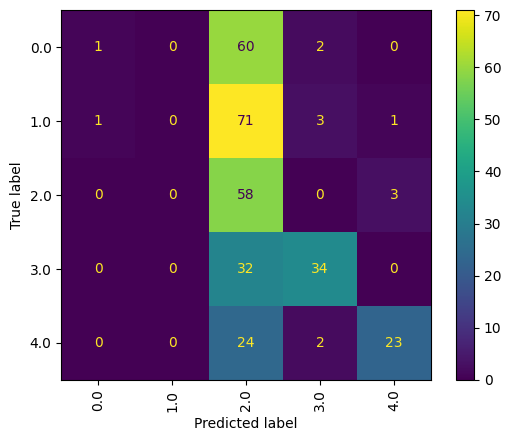

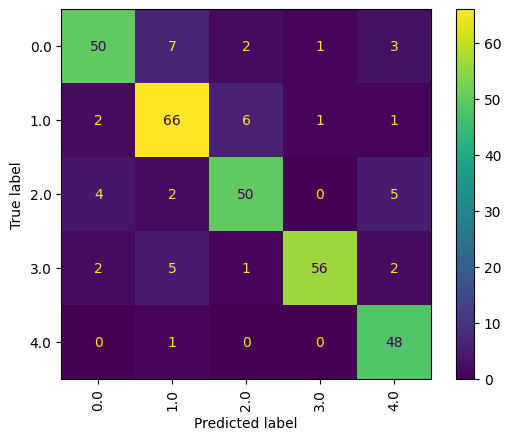

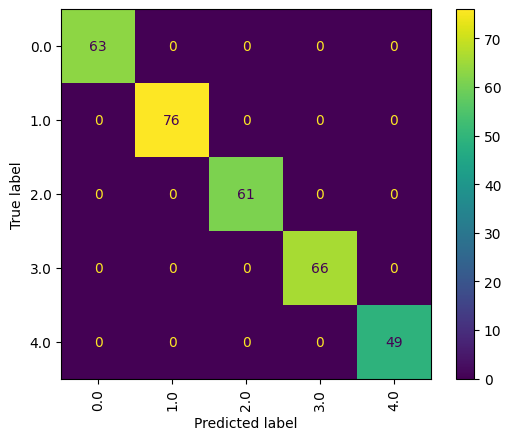

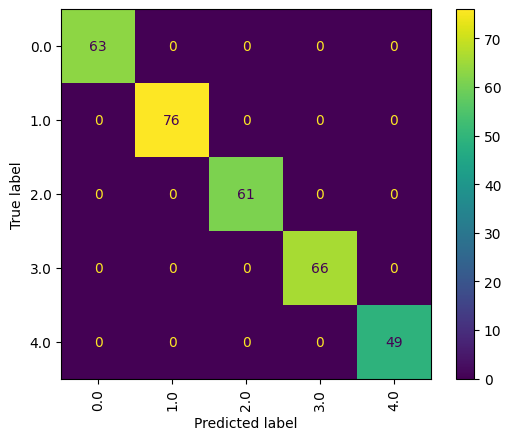

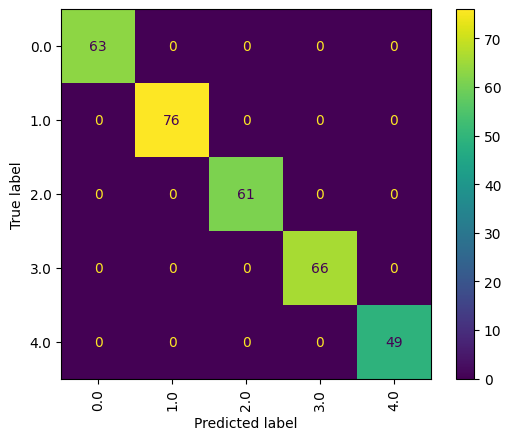

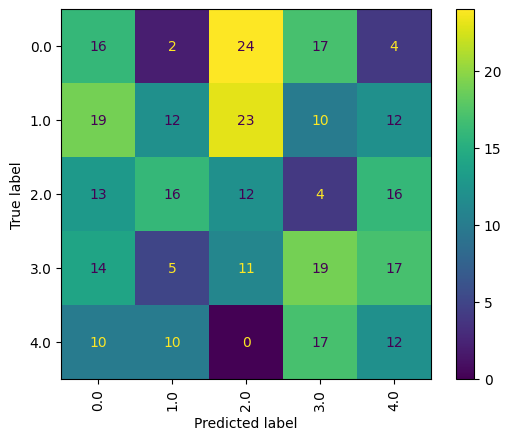

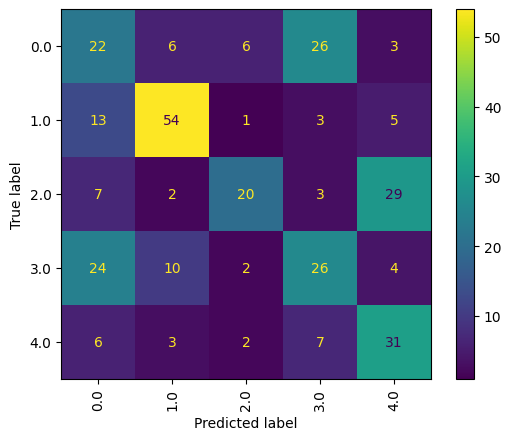

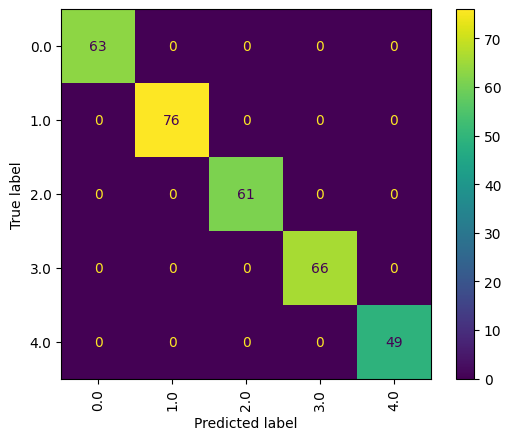

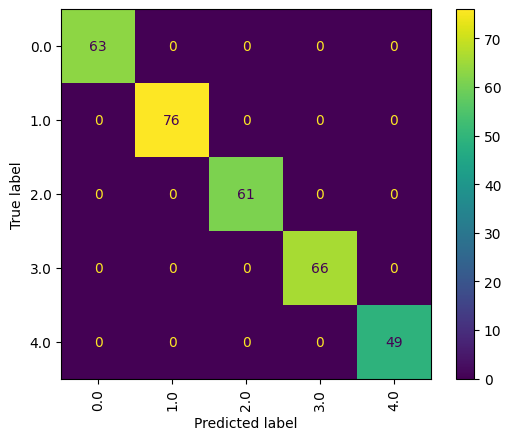

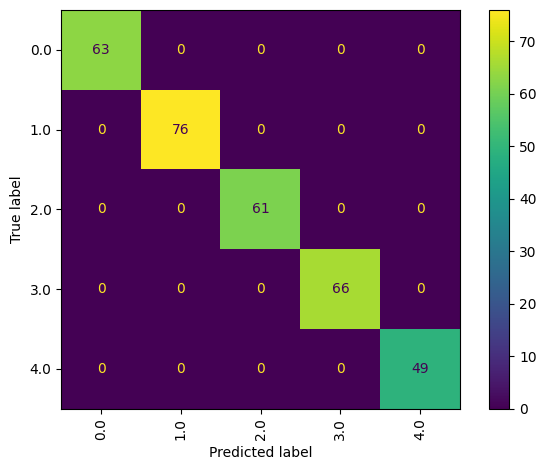

In [12]:
# Create small pipeline for each type of Classifier.
# Plot as sample entry from the data
# Loop through pipeline using Grid Search and plot the Confusion Matrix of the best model from each classifier pipeline

# Build Classifier Pipelines
decision_tree = pipeBuild_DecisionTreeClassifier(criterion=['gini','entropy'],max_depth=[5, 10])
random_forest = pipeBuild_RandomForestClassifier(criterion=['gini','entropy'],n_estimators=[10], max_depth=[3, 5, 10],max_features=[1])
knn = pipeBuild_KNeighborsClassifier(n_neighbors=[3,5],weights=['uniform'],algorithm=['auto'],leaf_size=[20,30])
gauss = pipeBuild_GaussianProcessClassifier(max_iter_predict=[100],multi_class=['one_vs_rest'])
ada = pipeBuild_AdaBoostClassifier(estimator=[DecisionTreeClassifier(),RandomForestClassifier()],n_estimators=[50],learning_rate=[1.0])
gnb = pipeBuild_GaussianNB(priors=[None],var_smoothing=[1.0e-9])
qda = pipeBuild_QuadraticDiscriminantAnalysis(priors=[None],reg_param=[0.0],store_covariance=[False],tol=[1.0e-4])
svc = pipeBuild_SVC(C=[1.0],kernel=['rbf'],degree=[3],gamma=['scale'],tol=[1.0e-3],random_state=None)
mlp = pipeBuild_MLPClassifier(hidden_layer_sizes=[(100,)],activation=['relu'],solver=['adam'],alpha=[0.0001],batch_size=['auto'],learning_rate=['constant'],random_state=None)
nusvc = pipeBuild_NuSVC(nu=[0.5],kernel=['rbf'],degree=[3],gamma=['scale'],tol=[1.0e-3],random_state=None)

# Create Pipe names list and Pipes list for GridSearch
names = ['Decision Tree','Random Forest','KNN','Gaussian','AdaBoost','GaussianNB','QDA','SVC','MLP','NuSVC']
pipes = [decision_tree,random_forest,knn,gauss,ada,gnb,qda,svc,mlp,nusvc]

# Use to test a single Pipeline
#names=['NuSVC']
#pipes=[nusvc]

samples = np.arange(len(X_train[0,:]))

# Plot a Sample data entry
fig1 = px.scatter(x = samples,y = X_train[0,:],title="Sample Data Entry")
fig1.show()


# iterate over pipelines w/ grid search
for j in range(len(names)):

    grid_search = GridSearchCV(estimator=pipes[j][0], param_grid=pipes[j][1], scoring='neg_mean_squared_error',cv=5, verbose=1, n_jobs=-1)
    grid_search.fit(X_train, y_train)
    score = grid_search.score(X_test, y_test)
    print("Best parameter (CV score=%0.3f):" % grid_search.best_score_)
    print(grid_search.best_params_)
    y_pred = grid_search.predict(X_test)
    print(classification_report(y_test, y_pred))
    ConfusionMatrixDisplay.from_estimator(grid_search, X_test, y_test, xticks_rotation="vertical")


plt.tight_layout()
plt.show()
#"""